In [ ]:
#konika-0280117201
#arpita-02601172021
#prachi suman-05101042021
#major project on employee attrition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
names = df.columns.values
print(names)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [ ]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Getting unique elements for every predictor variable

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Categorising on the basis of travel for business purposes; rarely,frequently or no travel



Categorising on the basis of education field



Categorising on the basis of working department

Setting predictor gender where male is indicated as 1 and female as 0

Categorising on the basis of Job Role

Categorising on the basis of Marital Status of Employee


Categorising on the basis of Attrition and Overtime

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,1,0,0,0,0,0,0,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,0,0,0,0,0,0,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,0,0,0,0,0,0,0,1,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,0,0,0,0,0,0,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,0,0,0,0,0,0,0,0,1,0


Converting datatypes of some predictor variables

In [ ]:
df.dtypes

Age                           int64
Attrition                     int64
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Business_Travel_Rarely        int64
Business_Travel_Frequently  

Finding coorelation among various predictors

In [ ]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,...,-0.002001,0.049726,0.098825,-0.175785,0.185891,0.294248,-0.029856,-0.119185,0.083919,0.033120
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,0.019774,-0.082994,-0.078696,0.157234,-0.088870,-0.083316,0.036215,0.175419,-0.090984,-0.087716
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,...,-0.000513,-0.005302,0.040141,0.005375,-0.000021,-0.013224,-0.021156,-0.075835,0.040035,0.037080
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,0.030761,0.011848,0.022916,-0.015994,-0.022351,-0.039190,-0.024089,-0.027445,0.030232,-0.005440
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,...,0.053398,-0.005290,0.024270,-0.091465,0.049694,0.028453,-0.005295,0.004168,-0.001865,-0.002439
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,...,-0.024421,0.059178,0.014090,0.002949,-0.048689,0.010730,-0.022014,0.009035,-0.022180,0.016439
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,-0.005348,-0.065197,0.006823,-0.028877,-0.006121,-0.033880,0.036082,-0.032752,-0.007804,0.046076
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.011886,-0.014394,0.014599,-0.018703,-0.025128,0.012659,-0.016189,-0.033436,0.036432,-0.006150
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,...,-0.011413,-0.021939,0.001272,-0.027282,0.015200,0.017112,-0.004952,-0.045253,0.028324,0.016815
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,...,0.127490,0.114896,0.115704,-0.216559,0.414319,0.552744,-0.100922,-0.087072,0.050547,0.037087


In [ ]:
df.std()

Age                              9.135373
Attrition                        0.367863
DailyRate                      403.509100
DistanceFromHome                 8.106864
Education                        1.024165
EnvironmentSatisfaction          1.093082
Gender                           0.490065
HourlyRate                      20.329428
JobInvolvement                   0.711561
JobLevel                         1.106940
JobSatisfaction                  1.102846
MonthlyIncome                 4707.956783
MonthlyRate                   7117.786044
NumCompaniesWorked               2.498009
OverTime                         0.450606
PercentSalaryHike                3.659938
PerformanceRating                0.360824
RelationshipSatisfaction         1.081209
StockOptionLevel                 0.852077
TotalWorkingYears                7.780782
TrainingTimesLastYear            1.289271
WorkLifeBalance                  0.706476
YearsAtCompany                   6.126525
YearsInCurrentRole               3

Dividing data into train and test dataset

In [ ]:
X_train = df.drop(['Attrition'],axis=1)
Y_train = df['Attrition']

X,test_x,Y,test_y = train_test_split(X_train, Y_train, test_size=0.3,random_state=20)
len(test_x)

441

Applying Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

reg = LinearDiscriminantAnalysis()
reg.fit(X,Y)

LinearDiscriminantAnalysis()

Calculating accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score

pred_y = reg.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
accuracy

0.8820861678004536

In [ ]:
print(X.shape)
print(Y.shape)

(1029, 49)
(1029,)


Plotting the Confusion Matrix

In [ ]:
confusion_matrix(test_y, pred_y)

array([[357,  14],
       [ 38,  32]])

In [ ]:
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

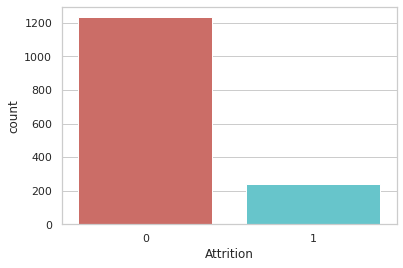

In [ ]:
sns.countplot(x='Attrition',data=df,palette='hls')
plt.show()

In [ ]:
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,0.593674,65.952149,2.770479,2.145985,2.778589,...,0.218167,0.109489,0.098946,0.040552,0.063260,0.078670,0.032441,0.283861,0.477697,0.238443
1,33.607595,750.362869,10.632911,2.839662,2.464135,0.632911,65.573840,2.518987,1.637131,2.468354,...,0.240506,0.042194,0.037975,0.139241,0.008439,0.021097,0.050633,0.506329,0.354430,0.139241


In [ ]:
count_no = len(df[df['Attrition']==0])
count_yes = len(df[df['Attrition']==1])
pct_of_no = count_no/(count_no+count_yes)
print("percentage of people with Attriton as NO", pct_of_no*100)
pct_yes = count_yes/(count_no+count_yes)
print("percentage of people with Attriton as YES", pct_yes*100)

percentage of people with Attriton as NO 83.87755102040816
percentage of people with Attriton as YES 16.122448979591837


In [ ]:
df.drop(0,inplace=True)
df.isnull().sum()

Age                           0
Attrition                     0
DailyRate                     0
DistanceFromHome              0
Education                     0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Business_Travel_Rarely        0
Business_Travel_Frequently    0
Business_Non-Travel           0
Life Sciences                 0
Medical                       0
Marketin

In [ ]:
df.dropna(axis=0,inplace=True)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,0,0,0,0,0,0,1,0,0
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,0,0,0,0,0,0,0,1,0
5,32,0,1005,2,2,4,1,79,3,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,0,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,...,0,0,1,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,...,0,1,0,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
attrition_count=pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,Attrition
0,1233
1,236


In [ ]:
#df.drop(['EmployeeCount','EmployeeNumber'],axis=1)

In [ ]:
attrition_dummies=pd.get_dummies(df['Attrition'])
attrition_dummies.head()

,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [ ]:
df=pd.concat([df,attrition_dummies],axis=1)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,0,0,0,0,1,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,0,1,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
5,32,0,1005,2,2,4,1,79,3,1,...,0,0,0,0,0,1,0,0,1,0


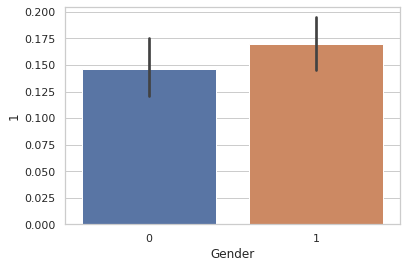

In [ ]:
sns.barplot(x='Gender',y=1,data=df)
#0 is male 1 is female

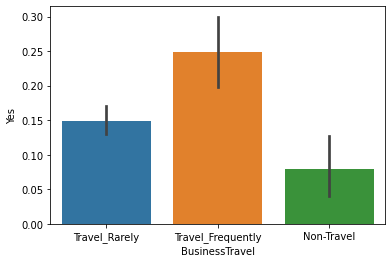

In [ ]:
sns.barplot(x='BusinessTravel',y='Yes',data=df)

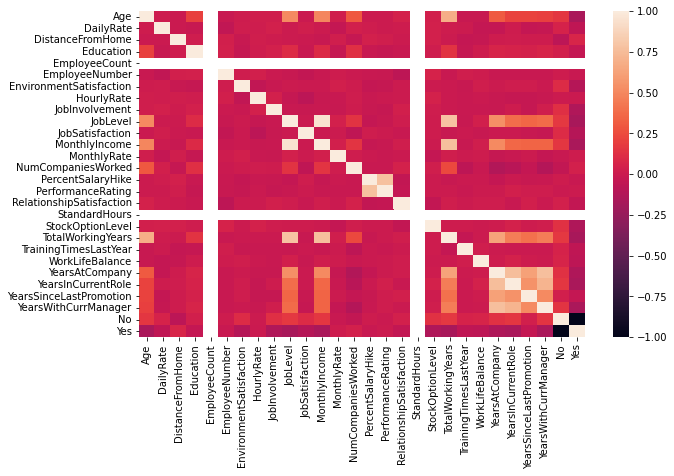

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [ ]:
func_dict = df["EducationField"].value_counts()
func_dict

1    605
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

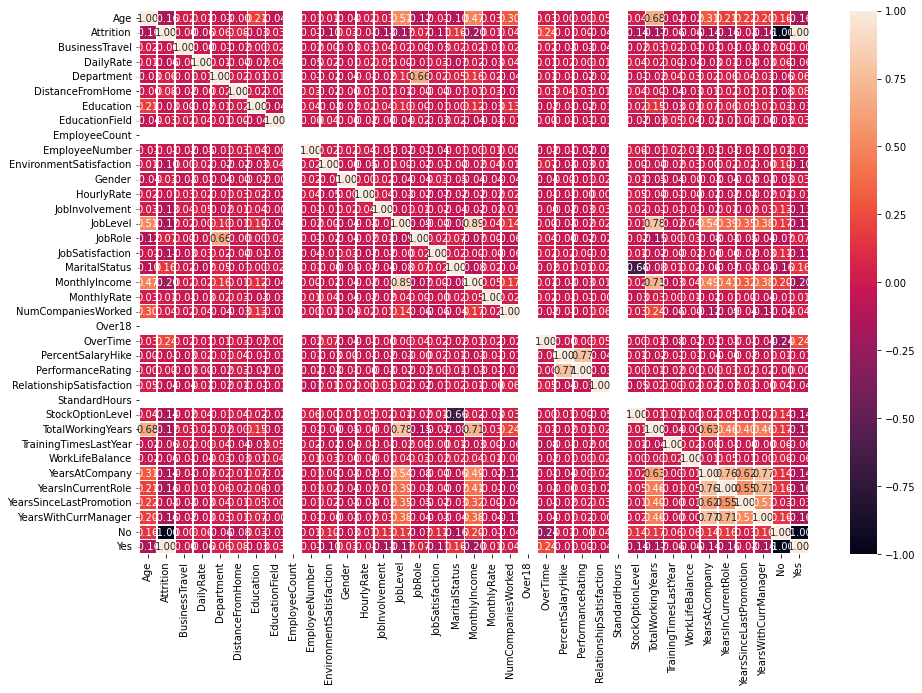

In [ ]:
#ans2)
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

Model development applying 6-ML algorithms

Logistic Regression

Decision tree

KNN

SVM

Random Forest

Naive Bayes

In [ ]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
x  = df.drop(['Yes'], axis = 1)
y = df['Yes']

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No
338,12,0,2,295,2,4,2,2,0,338,...,0,3,10,2,2,10,9,1,2,1
363,15,1,2,159,2,4,2,2,0,363,...,0,0,1,2,2,1,0,0,0,0
759,27,0,2,437,0,23,3,3,0,759,...,0,0,6,3,2,6,3,0,4,1
793,10,0,2,502,1,14,1,1,0,793,...,0,1,4,5,1,4,2,2,2,1
581,12,0,2,516,1,0,2,1,0,581,...,0,2,7,2,2,2,2,0,2,1


In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
rf.score(x_train, y_train)

1.0

In [ ]:
#Predicting for x_test
pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)

1.0

**Accuracy for Tested Data = 100%**

the three models are:

1.random forest

2.Decision trees

3.logistic regression



In [ ]:
#THE ACCURACY OF THE MODEL IS 100%
#THE BEST MODEL IS RANDOM FOREST

ans4) We can clearly see that the random forest Model performs the best out of all the different models that we tried. It achieves nearly 1.00 accuracy while classifying the employee attrition.

Although it should also be noted that the  Logistic Regression Model is the fastest to train and predict on. It also achieves 80% accuracy while calssifying.

**Initializing the models

Logistic Regression : C: Inverse of regularization strength (float), random state: (int), solver: sag,saga,liblinear (Here, we are using liblinear).

Decision trees: Default parameters

Random forest: Default parameters**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
x_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No
1316,25,0,1,839,2,1,3,1,0,1316,...,0,1,7,5,2,7,7,7,7,1
909,1,0,2,106,1,24,2,1,0,909,...,0,0,1,2,2,1,0,0,1,1
1453,18,0,2,635,2,10,3,2,0,1453,...,0,1,8,2,1,6,3,0,0,1
1358,13,0,2,608,2,9,1,3,0,1358,...,0,1,8,2,2,5,2,1,4,1
157,40,0,2,653,1,8,2,3,0,157,...,0,1,9,3,1,1,0,0,0,1


In [ ]:
#ANS5)
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(x_train,y_train)
    prediction=a.predict(x_train)
    y_pred=a.predict(x_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 1.000000
[Logistic Regression] test data accuracy is : 1.000000
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 1.000000
[KNN] training data accuracy is : 0.875850
[KNN] test data accuracy is : 0.826531
[SVM] training data accuracy is : 1.000000
[SVM] test data accuracy is : 1.000000
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 1.000000
[Naive Bayes] training data accuracy is : 1.000000
[Naive Bayes] test data accuracy is : 1.000000


In [ ]:
model_scores={'Logistic Regression':lr.score(x_test,y_test),
             'KNN classifier':knn.score(x_test,y_test),
             'Support Vector Machine':svm.score(x_test,y_test),
             'Random forest':rm.score(x_test,y_test),
              'Decision tree':dt.score(x_test,y_test),
              'Naive Bayes':gnb.score(x_test,y_test)
             }
model_scores

{'Decision tree': 1.0,
 'KNN classifier': 0.826530612244898,
 'Logistic Regression': 1.0,
 'Naive Bayes': 1.0,
 'Random forest': 1.0,
 'Support Vector Machine': 1.0}

***Classification Report of Random forest***

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(x_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        43

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



**Classification Report of Logistic Regression**

In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(x_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        43

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



Model Comparison

Based on the accuracy

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,1.0,0.826531,1.0,1.0,1.0,1.0


**Visualize the accuracy of each model**

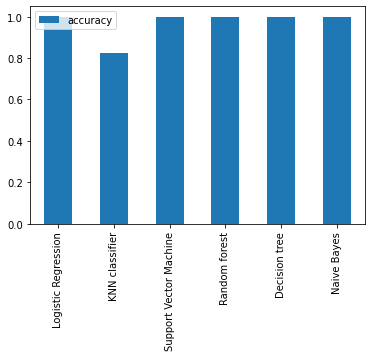

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [ ]:
# Logistic regression

In [ ]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.017280145527252853,
 'Attrition': 2.5329361572906435,
 'BusinessTravel': 0.04216843733938397,
 'DailyRate': -0.00032443254170183924,
 'Department': 0.18976731998897475,
 'DistanceFromHome': 0.014340034827225068,
 'Education': 0.02492692154576129,
 'EducationField': 0.05267382837793212,
 'EmployeeCount': 0.0,
 'EmployeeNumber': 3.438786417445697e-06,
 'EnvironmentSatisfaction': -0.16800532666715798,
 'Gender': 0.0782565249271711,
 'HourlyRate': -0.0001606080821354321,
 'JobInvolvement': -0.15492665643235573,
 'JobLevel': 0.0674432105478511,
 'JobRole': 0.012494033733388612,
 'JobSatisfaction': -0.17658577123687705,
 'MaritalStatus': 0.23737873786381117,
 'MonthlyIncome': -0.0008816888074625825,
 'MonthlyRate': 8.963195543881592e-05,
 'No': -2.48539777248199,
 'NumCompaniesWorked': 0.0845953345174698,
 'Over18': 0.0,
 'OverTime': 0.48995437977837214,
 'PercentSalaryHike': -0.016690712965908468,
 'PerformanceRating': 0.037377542926154514,
 'RelationshipSatisfaction': -0.0950152

**Visualize feature importance**

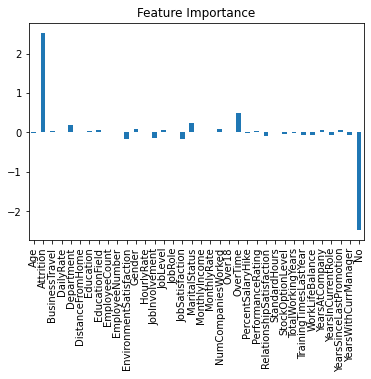

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")